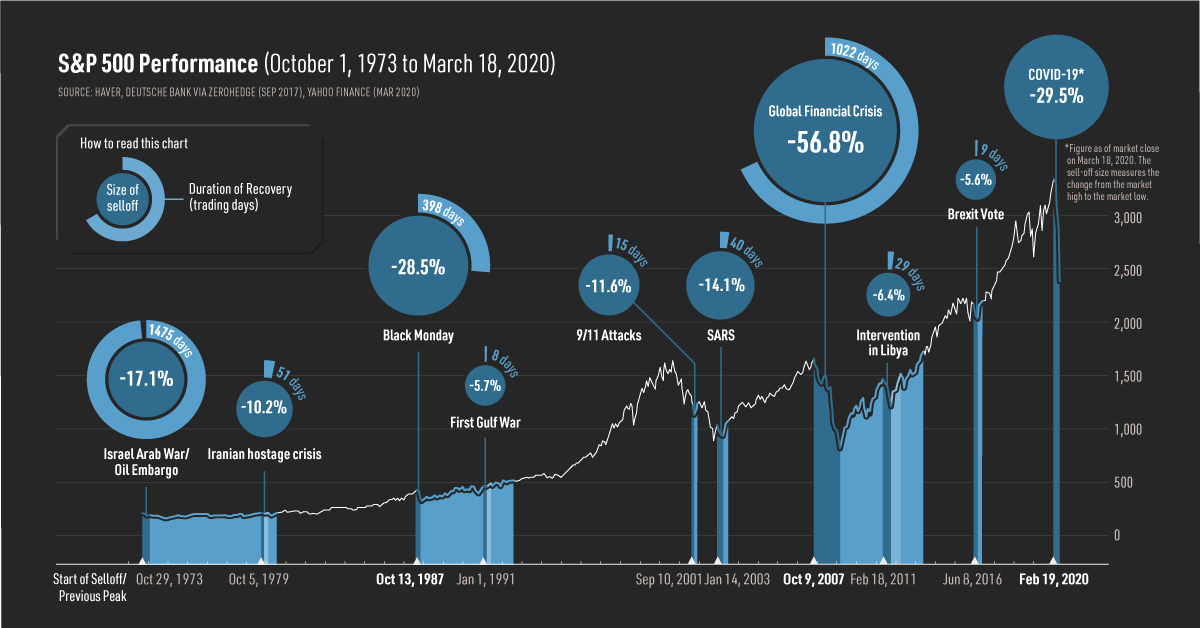

**Features:**
* Date: trading Date
* High: the high and low refer to the maximum and minimum prices in a given time period.
* Low: the high and low refer to the maximum and minimum prices in a given time period. Open and close are the prices at which a stock began and ended trading in the same period.
* Open: Open and close are the prices at which a stock began and ended trading in the same period.
* Volume: Volume is the total amount of trading activity.
* Adj Close: Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.
* Close: Open and close are the prices at which a stock began and ended trading in the same period.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop, Adam
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
from itertools import product
from scipy import stats
import tensorflow as tf


**Load Dataset**

In [ ]:
data = pd.read_csv('/content/yahoo_stock.csv')

In [ ]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [ ]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [216]:
# # Unix-time to
# data.Date = pd.to_datetime(data.Date)
# data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Close_diff
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,NaN
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,NaN


**DATA VISUALIZATION**

Text(0.5, 1.0, 'Non-Stationary Data')

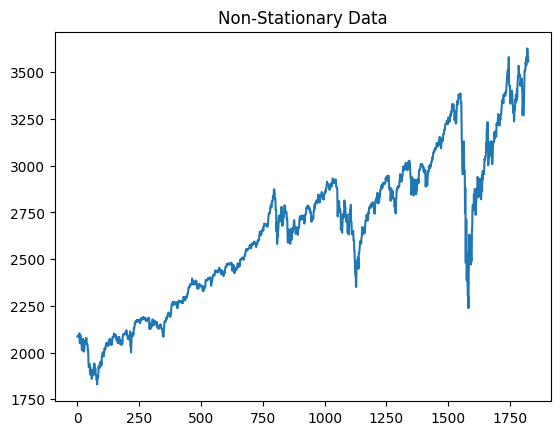

In [ ]:
plt.plot(data['Close'])
plt.title('Non-Stationary Data')

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.870397
p-value: 0.797565


In [217]:
# # Resampling to monthly frequency
# df_month = data.groupby('Date').sum().resample('M').mean()
# df_month

,High,Low,Open,Close,Volume,Adj Close,Close_diff
Date,,,,,,,
2015-11-30,2093.676300,2082.134949,2088.730011,2088.026306,2.731792e+09,2088.026306,0.000000
2015-12-31,2066.437146,2039.244200,2054.881942,2051.352913,3.815578e+09,2051.352913,0.000000
2016-01-31,1948.652903,1908.105158,1933.377111,1927.887408,4.739022e+09,1927.887408,0.000000
2016-02-29,1914.799304,1885.758284,1902.269641,1902.567938,4.620101e+09,1902.567938,0.000000
2016-03-31,2028.116132,2009.712583,2016.150962,2023.688059,4.391160e+09,2023.688059,0.000000
...,...,...,...,...,...,...,...
2020-07-31,3216.642917,3176.536109,3196.793867,3200.272579,4.341215e+09,3200.272579,216.722885
2020-08-31,3394.270004,3368.000961,3380.722893,3387.959701,4.011482e+09,3387.959701,484.127134
2020-09-30,3396.294312,3326.137305,3370.259985,3362.484326,4.483639e+09,3362.484326,385.190991


Text(0.5, 1.0, 'Non-Stationary Data')

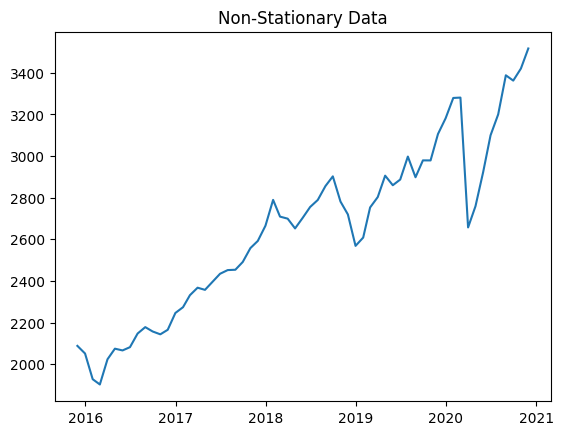

In [218]:
plt.plot(df_month['Close'])
plt.title('Non-Stationary Data')

In [219]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_month['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.397377
p-value: 0.910536


In [243]:
data['Close_diff'] = data.Close - data.Close.shift(30*12)

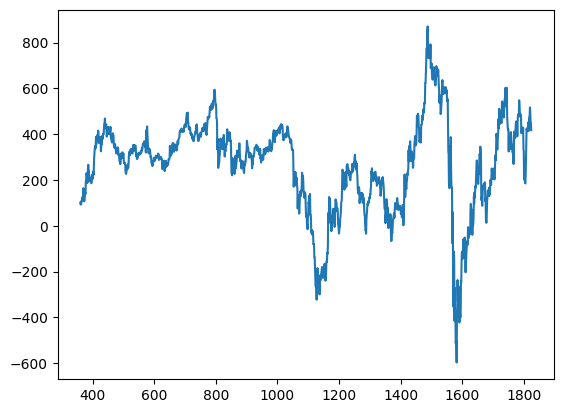

In [244]:
plt.plot(data['Close_diff'])

In [245]:
sm.tsa.stattools.adfuller(data['Close_diff'].dropna())[1]

0.006174791501601566

#**ARIMA**

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

# split into train and test sets
X = data['Close_diff']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in test.index:
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

<ipython-input-55-6deb930d46e0>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=-2.067197, expected=31.290039
predicted=31.256953, expected=39.510010
predicted=38.767819, expected=58.909912
predicted=61.875398, expected=95.560059
predicted=93.691330, expected=105.540039
predicted=107.004294, expected=110.550049
predicted=113.731813, expected=178.790039
predicted=175.986859, expected=244.679932
predicted=243.778337, expected=244.310059
predicted=253.038946, expected=235.969971
predicted=241.634024, expected=196.329834
predicted=194.198005, expected=188.089844
predicted=186.753532, expected=195.709961
predicted=191.419036, expected=159.839844
predicted=161.526649, expected=157.489990
predicted=158.627903, expected=177.589844
predicted=172.700285, expected=164.500000
predicted=166.143915, expected=233.560059
predicted=234.202475, expected=219.949951
predicted=218.539797, expected=189.709961
predicted=198.972903, expected=171.559814
predicted=167.102485, expected=262.719971
predicted=256.670592, expected=262.770020
predicted=261.772327, expected=268.929932
p

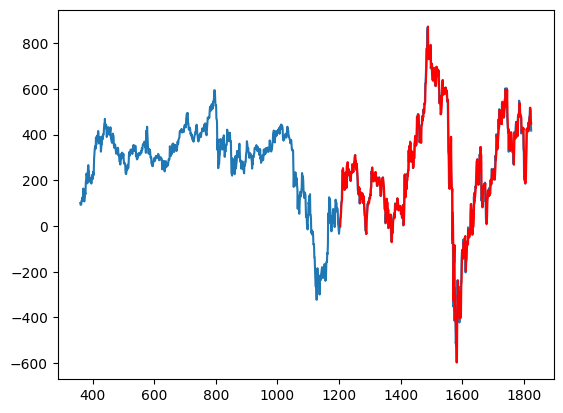

In [ ]:
# plot forecasts against actual outcomes
pyplot.plot(history)
pyplot.plot(np.arange(len(history)-len(predictions),len(history)), predictions, color='red')
pyplot.show()

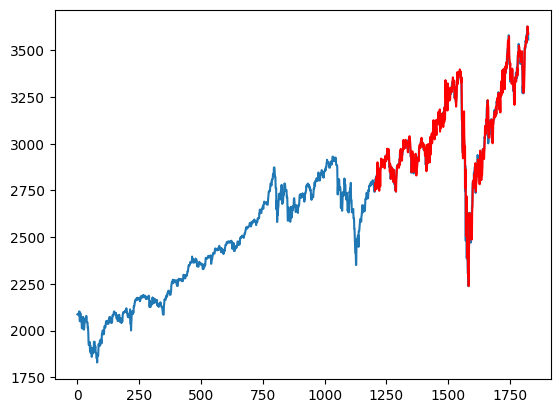

In [ ]:
# plot forecasts against actual outcomes After reconstraction
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(history)-len(predictions),len(history)), predictions + data.Close.shift(30*12)[np.arange(len(history)-len(predictions),len(history))], color='red')
pyplot.show()

> Error of ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, predictions)

2046.7830029240295

#**SARIMAX**

In [246]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = data['Close_diff']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in test.index:
#  print(f'Train Length = {len(history)}')
 model = sm.tsa.statespace.SARIMAX(history[:], order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

<ipython-input-246-59bbcd152f5d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=-2.067197, expected=31.290039
predicted=31.256953, expected=39.510010
predicted=38.767819, expected=58.909912
predicted=61.875398, expected=95.560059
predicted=93.691330, expected=105.540039
predicted=107.004294, expected=110.550049
predicted=113.731813, expected=178.790039
predicted=175.986859, expected=244.679932
predicted=243.778337, expected=244.310059
predicted=253.038946, expected=235.969971
predicted=241.634024, expected=196.329834
predicted=194.198005, expected=188.089844
predicted=186.753532, expected=195.709961
predicted=191.419036, expected=159.839844
predicted=161.526649, expected=157.489990
predicted=158.627903, expected=177.589844
predicted=172.700285, expected=164.500000
predicted=166.143915, expected=233.560059
predicted=234.202475, expected=219.949951
predicted=218.539797, expected=189.709961
predicted=198.972903, expected=171.559814
predicted=167.102485, expected=262.719971
predicted=256.670592, expected=262.770020
predicted=261.772327, expected=268.929932
p

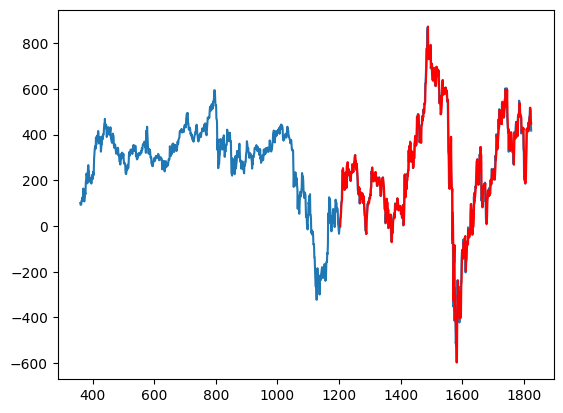

In [247]:
# plot forecasts against actual outcomes
pyplot.plot(history)
pyplot.plot(np.arange(len(history)-len(predictions),len(history)), predictions, color='red')
pyplot.show()

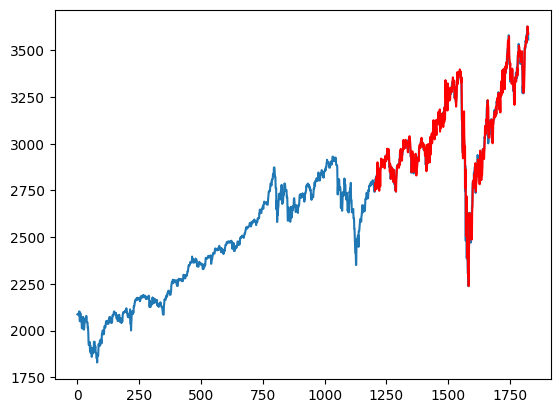

In [249]:
# plot forecasts against actual outcomes After reconstraction
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(history)-len(predictions),len(history)), predictions + data.Close.shift(30*12)[np.arange(len(history)-len(predictions),len(history))], color='red')
pyplot.show()

> Error of SARIMAX

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, predictions)

2046.7830029240295

#**Sequential Models**

In [ ]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,Close_diff
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,NaN
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,NaN
...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,516.619873
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,499.239990
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,457.500000
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,448.230225


In [ ]:
def train_validate_split(data):
    train, val =[], []
    for i in data.values:
      if i[0] < '2019-12-01':
        train.append(i[1:])
      if i[0] >= '2019-12-01':
        val.append(i[1:])
    return np.array(train), np.array(val)

train , validate = train_validate_split(data.dropna())

In [ ]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X)[: , :,-1], np.array(Y)[: , -1]

In [ ]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.01):
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(embedding, 1), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

In [ ]:
def build_lstm(num_units=128, embedding=4,num_dense=32,lr=0.01):
    model = Sequential()
    model.add(LSTM(units=num_units, input_shape=(embedding, 1), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

In [ ]:
def build_gru(num_units=128, embedding=4,num_dense=32,lr=0.01):
    model = Sequential()
    model.add(GRU(units=num_units, input_shape=(embedding, 1), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))

    return model

##**Step Size = 3**

In [ ]:
step = 3
x_train, y_train = convertToMatrix(train, step)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

x_val, y_val = convertToMatrix(validate, step)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
x_train.shape

TensorShape([1106, 3])

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=64,num_dense=32,embedding=3,lr=0.0005)
simple_rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 3s 38ms/step - loss: 39823.3672 - val_loss: 10203.9141
Epoch 2/1000
35/35 [==============================] - 1s 18ms/step - loss: 1329.5028 - val_loss: 3518.1929
Epoch 3/1000
35/35 [==============================] - 1s 17ms/step - loss: 758.7066 - val_loss: 3228.8386
Epoch 4/1000
35/35 [==============================] - 0s 13ms/step - loss: 695.8045 - val_loss: 3073.6431
Epoch 5/1000
35/35 [==============================] - 0s 13ms/step - loss: 664.0040 - val_loss: 2991.4790
Epoch 6/1000
35/35 [==============================] - 0s 13ms/step - loss: 653.9591 - val_loss: 2934.3242
Epoch 7/1000
35/35 [==============================] - 1s 18ms/step - loss: 635.1694 - val_loss: 2889.6155
Epoch 8/1000
35/35 [==============================] - 1s 17ms/step - loss: 628.1729 - val_loss: 2895.5107
Epoch 9/1000
35/35 [==============================] - 0s 14ms/step - loss: 626.3981 - val_loss: 2842.8965
Epoch 10/1000
35/35 [=====================

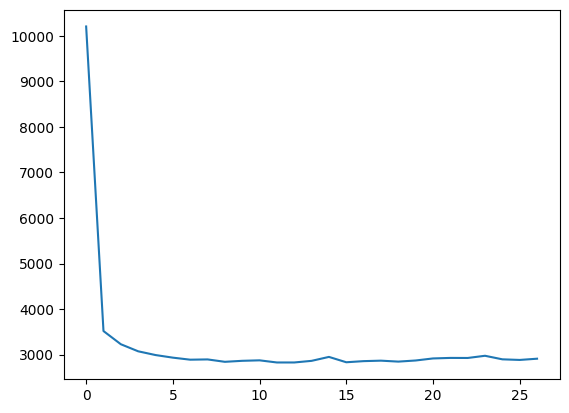

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

12/12 [==============================] - 0s 3ms/step


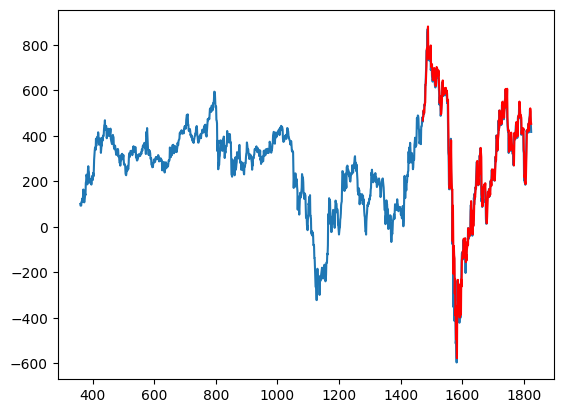

In [ ]:
# plot forecasts against actual outcomes
y_hat = simple_rnn_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

12/12 [==============================] - 0s 6ms/step


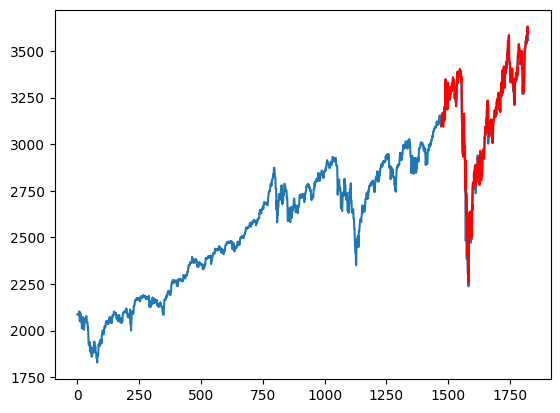

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = simple_rnn_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=64,num_dense=32,embedding=3,lr=0.0005)
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 7s 72ms/step - loss: 79713.8594 - val_loss: 122996.6875
Epoch 2/1000
35/35 [==============================] - 1s 40ms/step - loss: 41806.9766 - val_loss: 22243.1270
Epoch 3/1000
35/35 [==============================] - 1s 37ms/step - loss: 2581.4163 - val_loss: 7147.3662
Epoch 4/1000
35/35 [==============================] - 1s 39ms/step - loss: 1112.3929 - val_loss: 3609.0125
Epoch 5/1000
35/35 [==============================] - 1s 40ms/step - loss: 735.9783 - val_loss: 3185.6267
Epoch 6/1000
35/35 [==============================] - 1s 28ms/step - loss: 682.3223 - val_loss: 3089.8938
Epoch 7/1000
35/35 [==============================] - 1s 30ms/step - loss: 661.6063 - val_loss: 2966.6990
Epoch 8/1000
35/35 [==============================] - 1s 26ms/step - loss: 638.6103 - val_loss: 3165.4080
Epoch 9/1000
35/35 [==============================] - 1s 25ms/step - loss: 639.3726 - val_loss: 3141.8311
Epoch 10/1000
35/35 [================

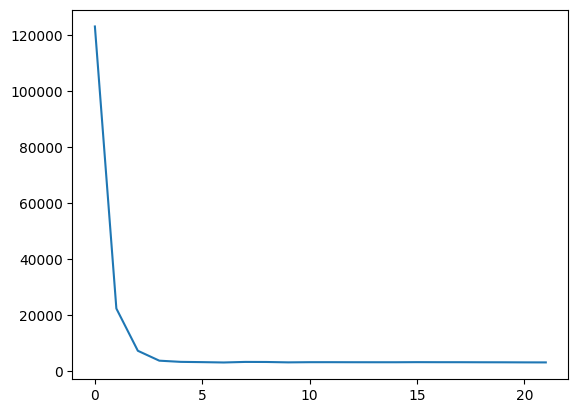

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

12/12 [==============================] - 1s 7ms/step


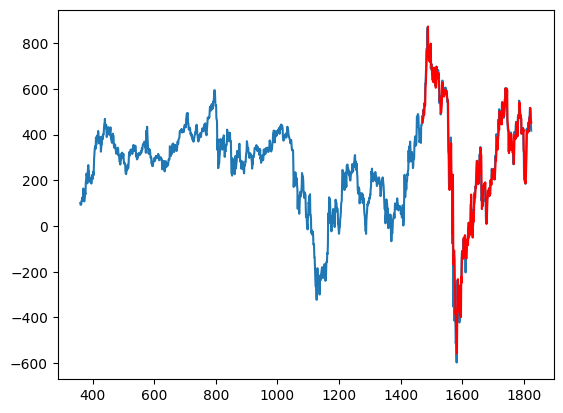

In [ ]:
# plot forecasts against actual outcomes
y_hat = lstm_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

12/12 [==============================] - 0s 6ms/step


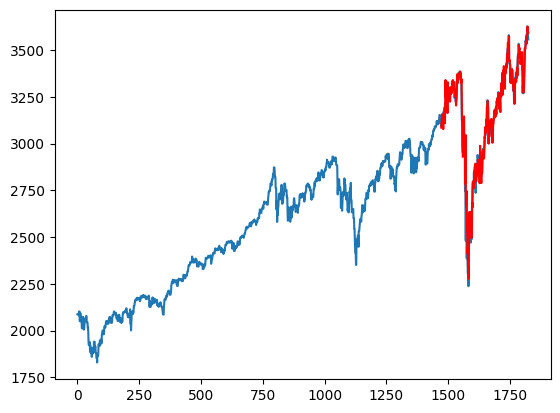

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = lstm_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**GRU**

In [ ]:
gru_model = build_gru(num_units=64,num_dense=32,embedding=3,lr=0.001)
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 6s 62ms/step - loss: 46870.4062 - val_loss: 21622.5273
Epoch 2/1000
35/35 [==============================] - 1s 22ms/step - loss: 2255.5659 - val_loss: 3701.7688
Epoch 3/1000
35/35 [==============================] - 1s 16ms/step - loss: 673.5001 - val_loss: 2939.2725
Epoch 4/1000
35/35 [==============================] - 0s 14ms/step - loss: 620.9797 - val_loss: 2894.2310
Epoch 5/1000
35/35 [==============================] - 1s 15ms/step - loss: 634.4365 - val_loss: 2959.7249
Epoch 6/1000
35/35 [==============================] - 1s 15ms/step - loss: 607.1509 - val_loss: 2896.2205
Epoch 7/1000
35/35 [==============================] - 1s 16ms/step - loss: 613.5197 - val_loss: 2805.4043
Epoch 8/1000
35/35 [==============================] - 1s 17ms/step - loss: 606.0051 - val_loss: 2929.2546
Epoch 9/1000
35/35 [==============================] - 1s 39ms/step - loss: 601.9404 - val_loss: 2877.4255
Epoch 10/1000
35/35 [=====================

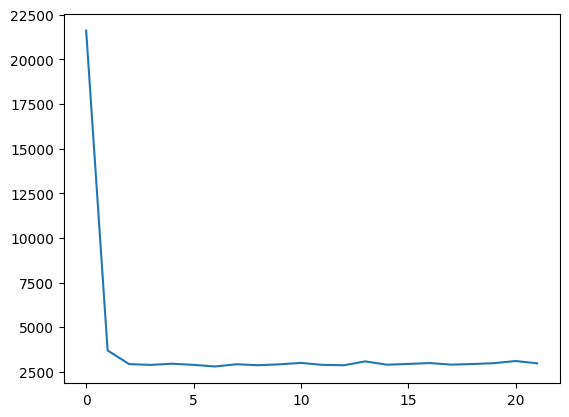

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

12/12 [==============================] - 1s 10ms/step


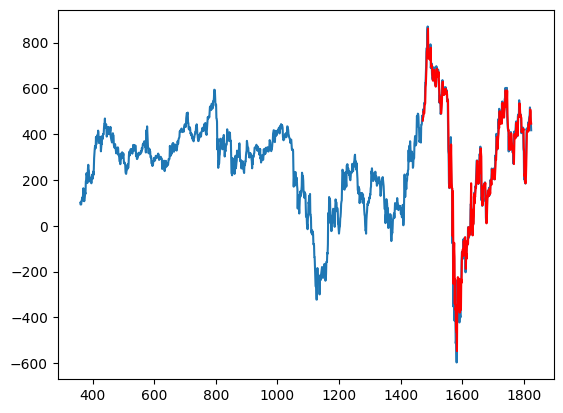

In [ ]:
# plot forecasts against actual outcomes
y_hat = gru_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

12/12 [==============================] - 0s 9ms/step


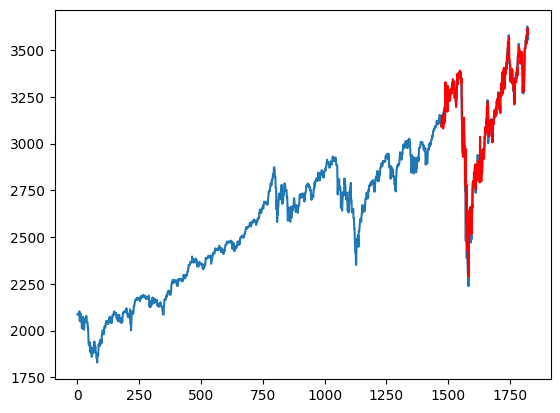

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = gru_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

##**Step Size = 10**

In [ ]:
step = 10
x_train, y_train = convertToMatrix(train, step)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

x_val, y_val = convertToMatrix(validate, step)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=64,num_dense=32,embedding=10,lr=0.001)
simple_rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 2s 21ms/step - loss: 6241.0259 - val_loss: 4056.9790
Epoch 2/1000
35/35 [==============================] - 0s 14ms/step - loss: 776.2644 - val_loss: 3170.6511
Epoch 3/1000
35/35 [==============================] - 1s 15ms/step - loss: 723.8123 - val_loss: 3033.6824
Epoch 4/1000
35/35 [==============================] - 1s 15ms/step - loss: 642.2771 - val_loss: 2950.5288
Epoch 5/1000
35/35 [==============================] - 0s 13ms/step - loss: 615.7162 - val_loss: 2900.2778
Epoch 6/1000
35/35 [==============================] - 0s 13ms/step - loss: 618.7719 - val_loss: 2824.5737
Epoch 7/1000
35/35 [==============================] - 0s 14ms/step - loss: 609.5560 - val_loss: 2797.9006
Epoch 8/1000
35/35 [==============================] - 1s 15ms/step - loss: 647.3442 - val_loss: 2844.9573
Epoch 9/1000
35/35 [==============================] - 0s 13ms/step - loss: 589.7080 - val_loss: 2765.7698
Epoch 10/1000
35/35 [========================

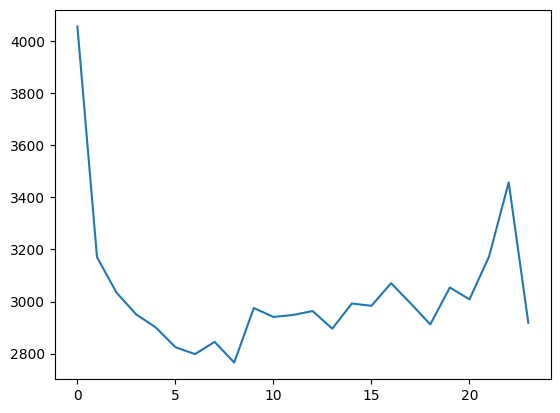

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 0s 5ms/step


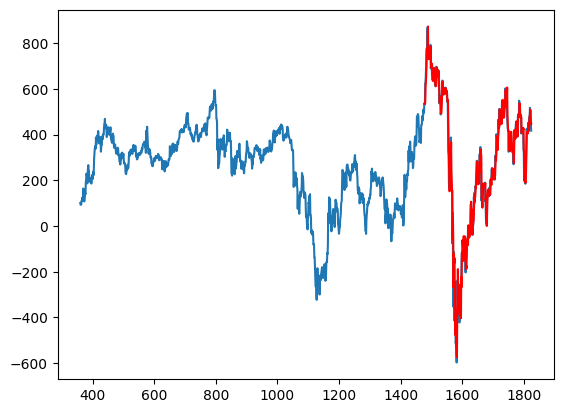

In [ ]:
# plot forecasts against actual outcomes
y_hat = simple_rnn_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 6ms/step


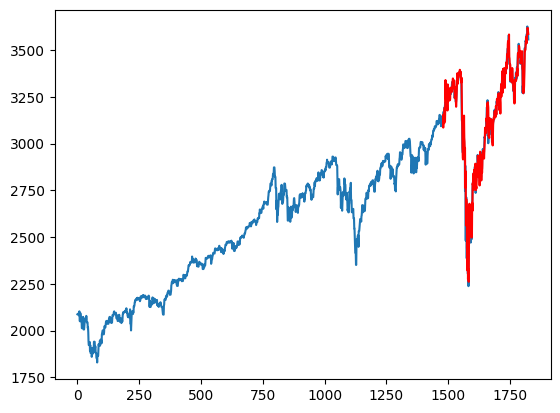

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = simple_rnn_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=64,num_dense=32,embedding=10,lr=0.0005)
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 4s 36ms/step - loss: 36873.0625 - val_loss: 24556.3418
Epoch 2/1000
35/35 [==============================] - 2s 53ms/step - loss: 3619.0205 - val_loss: 12474.6787
Epoch 3/1000
35/35 [==============================] - 2s 62ms/step - loss: 1816.6718 - val_loss: 7260.1772
Epoch 4/1000
35/35 [==============================] - 2s 54ms/step - loss: 1394.9287 - val_loss: 5198.1982
Epoch 5/1000
35/35 [==============================] - 3s 77ms/step - loss: 1030.9299 - val_loss: 5332.6050
Epoch 6/1000
35/35 [==============================] - 3s 99ms/step - loss: 902.6242 - val_loss: 5056.6938
Epoch 7/1000
35/35 [==============================] - 3s 77ms/step - loss: 815.0036 - val_loss: 4316.5112
Epoch 8/1000
35/35 [==============================] - 2s 66ms/step - loss: 767.7704 - val_loss: 4209.2148
Epoch 9/1000
35/35 [==============================] - 2s 61ms/step - loss: 777.7646 - val_loss: 4448.2749
Epoch 10/1000
35/35 [=================

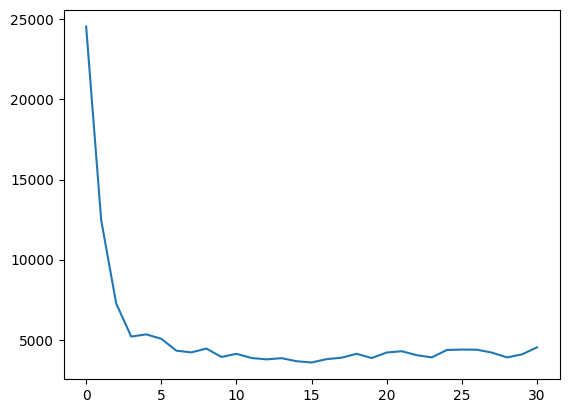

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 1s 16ms/step


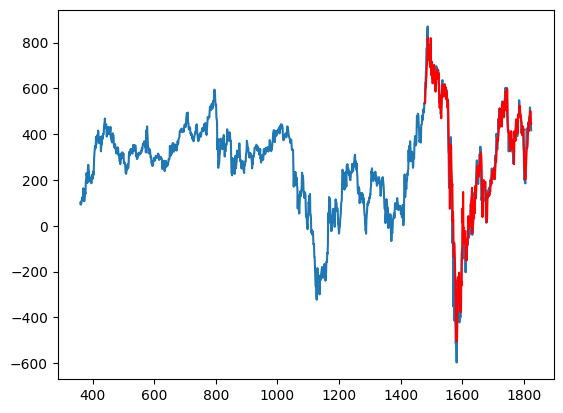

In [ ]:
# plot forecasts against actual outcomes
y_hat = lstm_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 15ms/step


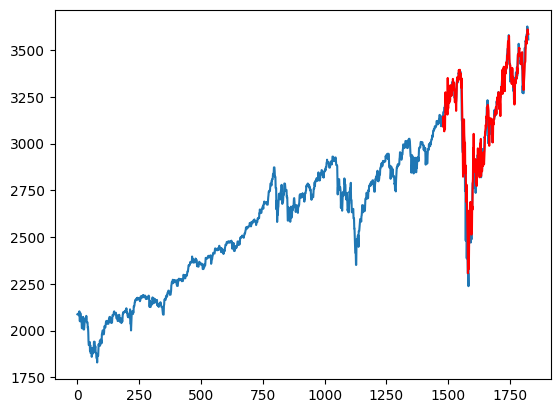

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = lstm_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**GRU**

In [ ]:
gru_model = build_gru(num_units=64,num_dense=32,embedding=10,lr=0.001)
gru_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
35/35 [==============================] - 6s 70ms/step - loss: 59896.2656 - val_loss: 21069.6602
Epoch 2/1000
35/35 [==============================] - 2s 65ms/step - loss: 2249.5955 - val_loss: 3364.9563
Epoch 3/1000
35/35 [==============================] - 2s 65ms/step - loss: 699.0364 - val_loss: 2941.0149
Epoch 4/1000
35/35 [==============================] - 3s 80ms/step - loss: 647.5342 - val_loss: 3004.4407
Epoch 5/1000
35/35 [==============================] - 3s 86ms/step - loss: 645.5535 - val_loss: 2936.1792
Epoch 6/1000
35/35 [==============================] - 2s 60ms/step - loss: 617.6214 - val_loss: 3111.8652
Epoch 7/1000
35/35 [==============================] - 2s 58ms/step - loss: 606.1200 - val_loss: 2966.7351
Epoch 8/1000
35/35 [==============================] - 1s 35ms/step - loss: 617.3072 - val_loss: 2871.9192
Epoch 9/1000
35/35 [==============================] - 1s 35ms/step - loss: 580.7913 - val_loss: 2985.6721
Epoch 10/1000
35/35 [=====================

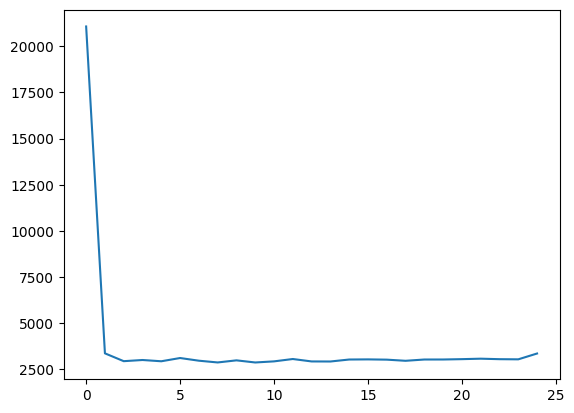

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 0s 4ms/step


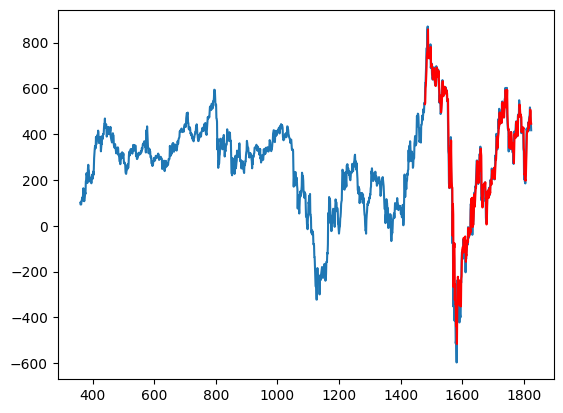

In [ ]:
# plot forecasts against actual outcomes
y_hat = gru_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 6ms/step


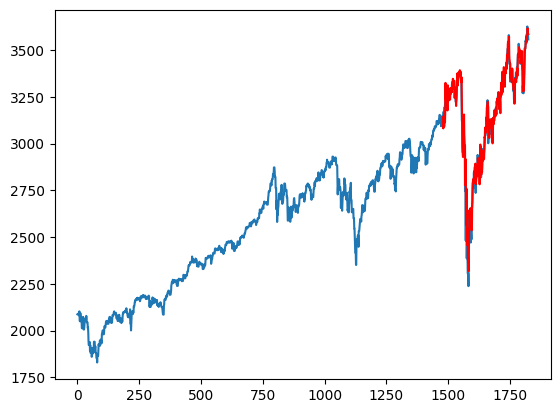

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = gru_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

##**Step Size = 30**

In [ ]:
step = 30
x_train, y_train = convertToMatrix(train, step)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

x_val, y_val = convertToMatrix(validate, step)
x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=15)

**Simple RNN**

In [ ]:
simple_rnn_model = build_simple_rnn(num_units=64,num_dense=32,embedding=30,lr=0.0005)
simple_rnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = simple_rnn_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
34/34 [==============================] - 2s 37ms/step - loss: 14598.6445 - val_loss: 5519.2031
Epoch 2/1000
34/34 [==============================] - 1s 29ms/step - loss: 1001.2969 - val_loss: 3825.8352
Epoch 3/1000
34/34 [==============================] - 1s 31ms/step - loss: 793.8478 - val_loss: 3497.9219
Epoch 4/1000
34/34 [==============================] - 1s 27ms/step - loss: 718.4772 - val_loss: 3478.3052
Epoch 5/1000
34/34 [==============================] - 1s 28ms/step - loss: 698.0801 - val_loss: 3269.4648
Epoch 6/1000
34/34 [==============================] - 1s 40ms/step - loss: 687.6159 - val_loss: 3187.0637
Epoch 7/1000
34/34 [==============================] - 1s 43ms/step - loss: 645.4799 - val_loss: 3069.5618
Epoch 8/1000
34/34 [==============================] - 2s 44ms/step - loss: 634.1047 - val_loss: 3064.8313
Epoch 9/1000
34/34 [==============================] - 1s 31ms/step - loss: 618.9214 - val_loss: 3078.8767
Epoch 10/1000
34/34 [======================

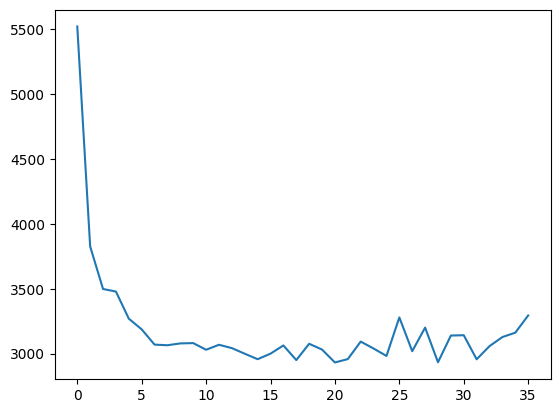

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 0s 6ms/step


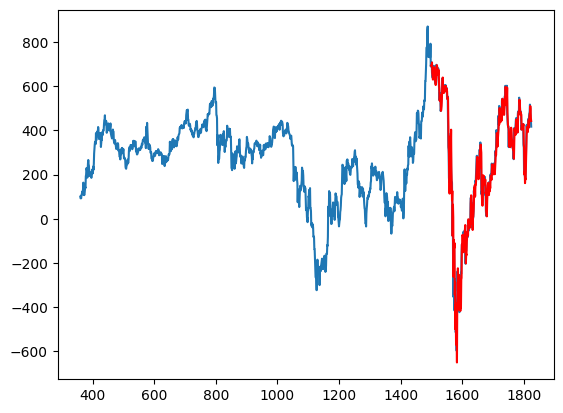

In [ ]:
# plot forecasts against actual outcomes
y_hat = simple_rnn_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 6ms/step


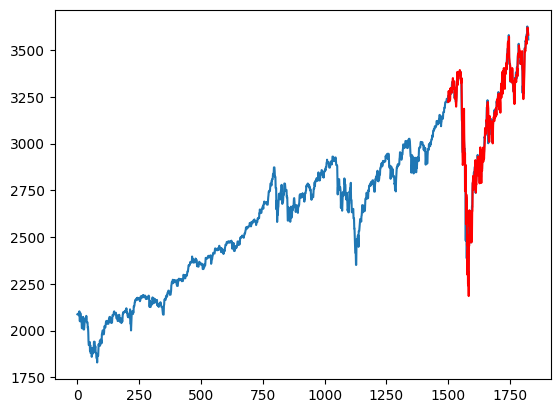

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = simple_rnn_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**LSTM**

In [ ]:
lstm_model = build_lstm(num_units=64,num_dense=32,embedding=30,lr=0.0005)
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = lstm_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
34/34 [==============================] - 4s 73ms/step - loss: 19347.4453 - val_loss: 31361.4199
Epoch 2/1000
34/34 [==============================] - 2s 71ms/step - loss: 5554.0688 - val_loss: 20952.9238
Epoch 3/1000
34/34 [==============================] - 4s 129ms/step - loss: 3512.2715 - val_loss: 18011.2070
Epoch 4/1000
34/34 [==============================] - 2s 66ms/step - loss: 3626.5549 - val_loss: 14413.3652
Epoch 5/1000
34/34 [==============================] - 2s 63ms/step - loss: 3509.6787 - val_loss: 19130.1094
Epoch 6/1000
34/34 [==============================] - 2s 64ms/step - loss: 4261.0869 - val_loss: 45281.9844
Epoch 7/1000
34/34 [==============================] - 3s 101ms/step - loss: 7906.7954 - val_loss: 37391.3164
Epoch 8/1000
34/34 [==============================] - 4s 115ms/step - loss: 4566.2417 - val_loss: 26122.8125
Epoch 9/1000
34/34 [==============================] - 2s 63ms/step - loss: 5949.3369 - val_loss: 26535.0488
Epoch 10/1000
34/34 [===

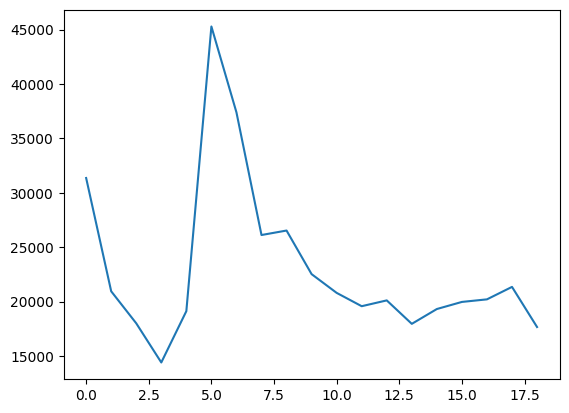

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 0s 8ms/step


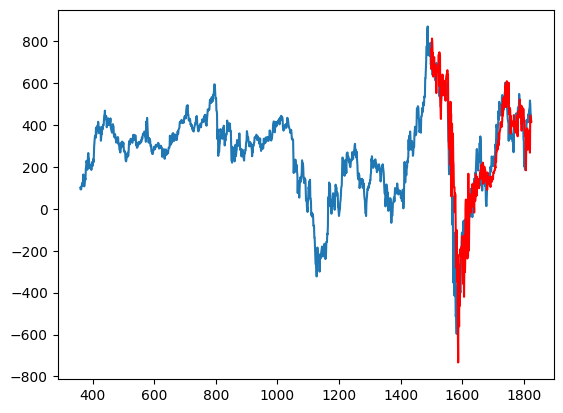

In [ ]:
# plot forecasts against actual outcomes
y_hat = lstm_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 9ms/step


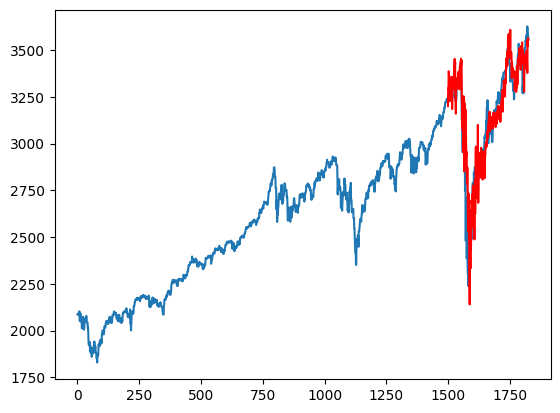

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = lstm_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()

**GRU**

In [ ]:
gru_model = build_gru(num_units=64,num_dense=32,embedding=30,lr=0.0005)
gru_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1000

history = gru_model.fit(x_train,y_train,
          epochs=num_epochs,
          validation_data=(x_val, y_val),
          callbacks= [es])

Epoch 1/1000
34/34 [==============================] - 4s 90ms/step - loss: 77716.1484 - val_loss: 92512.2734
Epoch 2/1000
34/34 [==============================] - 5s 144ms/step - loss: 24957.6543 - val_loss: 8579.7930
Epoch 3/1000
34/34 [==============================] - 5s 139ms/step - loss: 1181.0969 - val_loss: 3614.8716
Epoch 4/1000
34/34 [==============================] - 3s 82ms/step - loss: 702.6326 - val_loss: 3214.9580
Epoch 5/1000
34/34 [==============================] - 3s 78ms/step - loss: 658.2560 - val_loss: 3300.2676
Epoch 6/1000
34/34 [==============================] - 3s 78ms/step - loss: 612.1580 - val_loss: 3278.2620
Epoch 7/1000
34/34 [==============================] - 4s 115ms/step - loss: 597.3970 - val_loss: 3155.4775
Epoch 8/1000
34/34 [==============================] - 3s 101ms/step - loss: 587.1242 - val_loss: 3055.1379
Epoch 9/1000
34/34 [==============================] - 3s 79ms/step - loss: 593.9980 - val_loss: 3370.7346
Epoch 10/1000
34/34 [===============

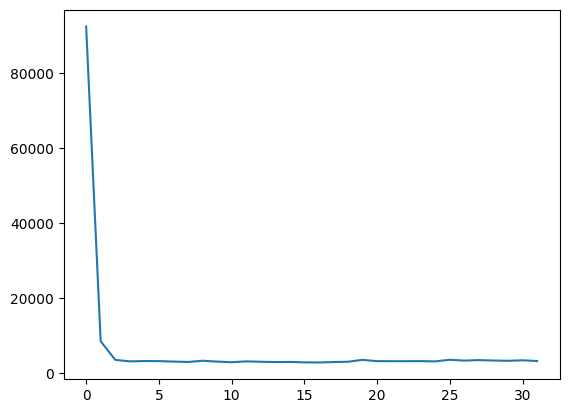

In [ ]:
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'])

11/11 [==============================] - 0s 10ms/step


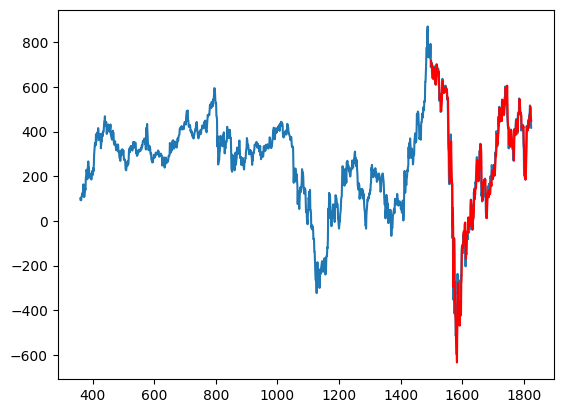

In [ ]:
# plot forecasts against actual outcomes
y_hat = gru_model.predict(x_val)
pyplot.plot(data.iloc[:,-1])
pyplot.plot(np.arange(len(data.iloc[:,-1])-len(y_hat),len(data.iloc[:,-1])), y_hat, color='red')
pyplot.show()

11/11 [==============================] - 0s 9ms/step


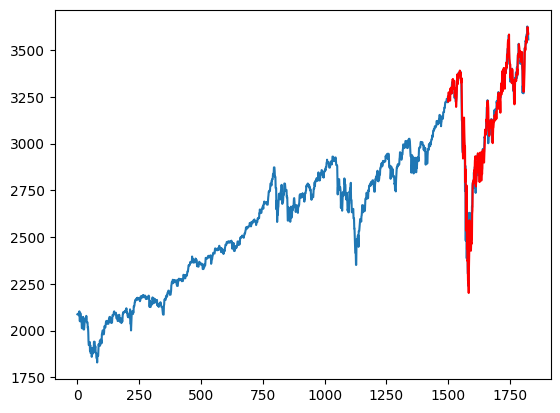

In [ ]:
# plot forecasts against actual outcomes After reconstraction
y_hat = gru_model.predict(x_val)
reconstructed = (y_hat + np.array(data.Close.shift(30*12).iloc[np.arange(len(data.Close)-len(y_hat),len(data.Close))]).reshape(-1,1))
pyplot.plot(data.Close)
pyplot.plot(np.arange(len(data.Close)-len(y_hat),len(data.Close)), reconstructed, color='red')
pyplot.show()